In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.decomposition import PCA
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Read data from csv file
data = pd.read_csv("C:\\Users\\saura\\Downloads\\heart_dataset_final - Copy.csv")
print('Number of attributes: %d' %(data.shape[1]))
print('Number of instances in the dataset: %d' % (data.shape[0]))
data.head

Number of attributes: 12
Number of instances in the dataset: 6283


<bound method NDFrame.head of       age  sex  cp  trestbps chol  fbs  restecg thalach  exang  oldpeak  thal  \
0      63    0   0       120  229    0        1     120      0      1.2     1   
1      63    1   0       180  196    0        0     142      1      0.0     2   
2      58    0   0       125  250    0        0     160      0      0.0     3   
3      66    0   2       150  302    1        1     192      1      0.3     2   
4      45    0   1       164  149    0        0     103      0      0.0     3   
...   ...  ...  ..       ...  ...  ...      ...     ...    ...      ...   ...   
6278   71    0   2       110  265    1        0     130      0      0.0     2   
6279   71    0   0       112  149    0        1       ?      0      1.6     2   
6280   74    0   1       120  269    0        0     121      1      0.2     2   
6281   76    0   2       140  197    0        2     116      0      1.1     2   
6282   77    1   0       125  304    0        0     162      1      0.0     2  

In [3]:
#Check if any null value present
print("Number of Null values:")
for col in data.columns:
    data[col]=pd.to_numeric(data[col],errors='coerce')
    print('\t%s: %d'%(col,data[col].isnull().sum()))

Number of Null values:
	age: 0
	sex: 0
	cp: 0
	trestbps: 0
	chol: 11
	fbs: 0
	restecg: 0
	thalach: 12
	exang: 0
	oldpeak: 0
	thal: 0
	target: 0


In [4]:
#Replacing null values with mean
data['chol']=data['chol'].fillna(data['chol'].mean())
data['thalach']=data['thalach'].fillna(data['thalach'].mean())

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
thal        0
target      0
dtype: int64

In [5]:
#Checking for missing values
print("Number of Null values:")
for col in data.columns:
    print('\t%s: %d'%(col,data[col].isna().sum()))

Number of Null values:
	age: 0
	sex: 0
	cp: 0
	trestbps: 0
	chol: 0
	fbs: 0
	restecg: 0
	thalach: 0
	exang: 0
	oldpeak: 0
	thal: 0
	target: 0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

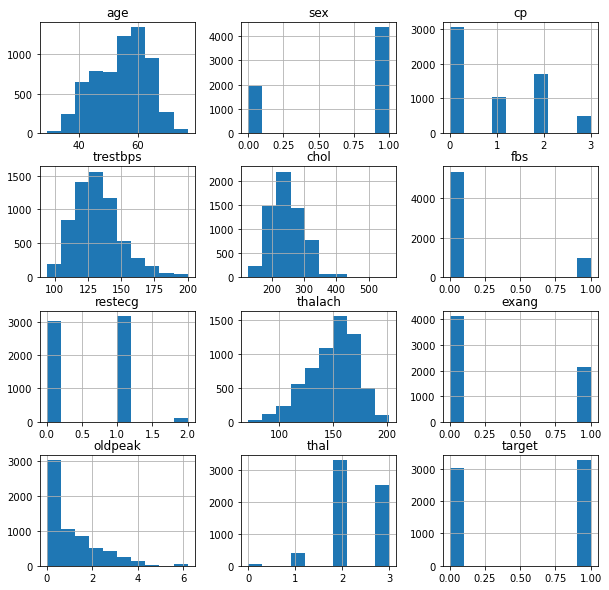

In [6]:
#Plot the historgram for all the columns
data.hist(figsize=(10,10))

<AxesSubplot:>

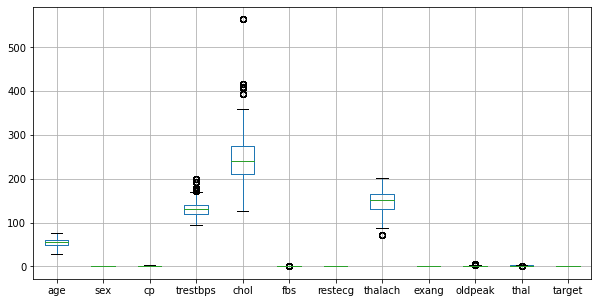

In [7]:
#Plot the box plot graph for outlier values
data.boxplot(figsize=(10,5))

In [8]:
#In order to adjust the data and remove the outliers, we are trying to find the columns having abnormally high values.
#And to discard the outliers we are calculating Z score and remove those high values as we consider them as outliers
Z=(data-data.mean())/data.std()
Z[100:200]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,target
100,-1.815995,-1.499450,-0.914934,-0.100437,0.221844,-0.424903,-1.012204,-2.370553,1.389315,-0.907539,-0.518844,0.962581
101,0.395375,0.666805,0.054137,-0.383723,-0.769739,-0.424903,-1.012204,0.041605,1.389315,0.279473,1.085437,-1.038708
102,1.390492,0.666805,1.023208,0.466134,0.552371,2.353104,-1.012204,1.094184,-0.719665,-0.907539,1.085437,0.962581
103,-0.820878,-1.499450,0.054137,1.599276,-0.536425,2.353104,0.872703,-0.747828,1.389315,-0.907539,1.085437,0.962581
104,0.505944,0.666805,-0.914934,0.919391,0.707914,-0.424903,0.872703,0.918754,-0.719665,-0.907539,1.085437,0.962581
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.169355,0.666805,1.023208,1.032705,-1.353023,-0.424903,-1.012204,-0.265397,1.389315,-0.907539,1.085437,-1.038708
196,-0.599741,-1.499450,1.023208,-0.667008,3.157707,-0.424903,0.872703,-1.931979,-0.719665,0.279473,-0.518844,0.962581
197,-1.042015,0.666805,-0.914934,-0.553694,-0.030913,-0.424903,0.872703,0.524037,-0.719665,-0.144460,-2.123126,0.962581
198,-1.815995,0.666805,1.023208,-0.383723,0.066301,-0.424903,-1.012204,-1.668834,-0.719665,0.618619,-0.518844,0.962581


In [9]:
print("Number of rows before discarding the outliers: %d"% (Z.shape[0]))
#Calculate the number of outliers by checking the z-score of that particular data 
z1 = Z.values.tolist()
cnt = 0
for i in range(3,5) :
    for j in range(len(z1)) :
        if z1[j][i] > 3 or z1[j][i] < -3 :
            cnt += 1
            
print("The number of outliers in given data :",cnt)

Number of rows before discarding the outliers: 6283
The number of outliers in given data : 124


In [10]:
#Remove the duplicates from the data
dup=data.duplicated()
print("Number of duplicated rows = %d"%(dup.sum()))
data_final=data.drop_duplicates()
print("Number of rows after discarding the duplicate rows: %d" % (data_final.shape[0]))

Number of duplicated rows = 958
Number of rows after discarding the duplicate rows: 5325


In [11]:
#Split the data into predictors and response variables
unscaled_data = data_final.iloc[:,0:11]
target = data_final.iloc[:,11]

In [12]:
#Scale the given data using StandardScaler
scaled_data = StandardScaler().fit_transform(unscaled_data)

In [13]:
#Apply PCA on scaled data for reduction of dimnesionality
scaled_pca = PCA(n_components = 2)
scaled_pca.fit(scaled_data)
scaled_pca_data = scaled_pca.transform(scaled_data)
print(scaled_pca,scaled_pca.explained_variance_ratio_,scaled_pca.singular_values_)

PCA(n_components=2) [0.09936633 0.09658436] [76.29143379 75.21588174]


In [14]:
#Splitting scaled and unscaled data into train and test dataset
unscaled_data_train,unscaled_data_test,target_train,target_test = train_test_split(unscaled_data,target,test_size = 0.2, random_state = 50)
scaled_data_train,scaled_data_test,target_train,target_test = train_test_split(scaled_pca_data,target,test_size = 0.2, random_state = 50)

In [15]:
print(unscaled_data_train.shape,unscaled_data_test.shape,scaled_data_train.shape,scaled_data_test.shape)

(4260, 11) (1065, 11) (4260, 2) (1065, 2)


In [16]:
#Plot the precision recall curve using predicted response  by our model and actual response
def plot_precision_recall_curve(y_actual, y_score, model_name):
    precision, recall, _ = metrics.precision_recall_curve(y_actual, y_score)
    curve_data = pd.DataFrame(columns = range(0, len(precision)))
    curve_data.loc['Precision'] = precision
    curve_data.loc['Recall'] = recall
    #print (curve_data)
    plt.step(recall, precision, color='b', alpha=0.1, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.1, color='b')
    plt.title('Precision Recall Curve for {} Model'.format(model_name))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0, 1.05])
    plt.ylim([0, 1.0])

#Evaluate our given model using predicted values by our model and actual values
def evaluate_model(y_actual, y_pred, y_score, model_name):
    cm = metrics.confusion_matrix(y_actual, y_pred)
    print ('Confusion Matrix for {} Model'.format(model_name))
    print (cm)
    print ('Classification Report for {} Model'.format(model_name))
    print (metrics.classification_report(y_actual, y_pred, digits=6))
    print ('Area under under ROC curve for {} Model'.format(model_name))
    print (metrics.roc_auc_score(y_actual, y_score))
    plot_precision_recall_curve(y_actual, y_score, model_name)

<h3>KNN</h3>

<h4>KNN on unscaled data</h4>

In [17]:
#KNN on unscaled data for a random value of k
k = 3
knn = KNeighborsClassifier(n_neighbors = k).fit(unscaled_data_train,target_train)
target_pred = knn.predict(unscaled_data_test)
print("Accuracy of model at K=3 is",metrics.accuracy_score(target_test, target_pred) * 100,"%")

Accuracy of model at K=3 is 48.63849765258216 %


Minimum error for cosine :- 0.47136150234741786 at K = 8
Minimum error for minkowski :- 0.49859154929577465 at K = 48


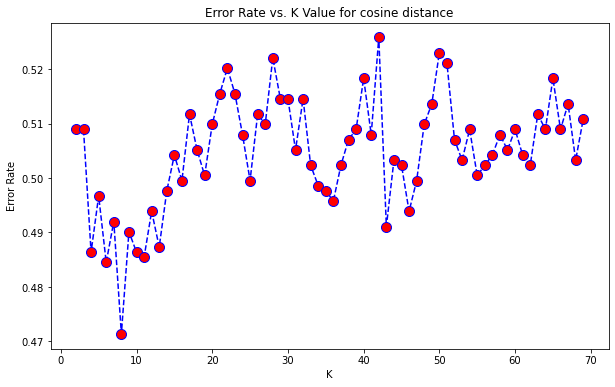

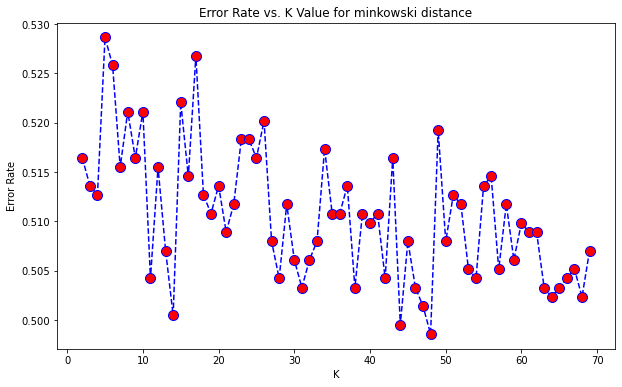

In [18]:
#KNN on unscaled data using minkowski and cosine metric and get best k value for both metrics
for m in ("cosine","minkowski") :
    error_rate = []
    for i in range(2,70):
        knn = KNeighborsClassifier(n_neighbors=i , metric = m)
        knn.fit(unscaled_data_train,target_train)
        pred_i = knn.predict(unscaled_data_test)
        error_rate.append(np.mean(pred_i != target_test))


    plt.figure(figsize=(10,6))
    plt.plot(range(2,70),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value for '+m+' distance')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    print("Minimum error for",m,":-",min(error_rate),"at K =",error_rate.index(min(error_rate))+2)

In [19]:
#Get the accuracy for best k value for both distance metrics
k = 8
knn = KNeighborsClassifier(n_neighbors = k).fit(unscaled_data_train,target_train)
target_pred = knn.predict(unscaled_data_test)
print("Accuracy of model at K=8 for cosine metric is",metrics.accuracy_score(target_test, target_pred)*100,"%")

k = 48
knn = KNeighborsClassifier(n_neighbors = k).fit(unscaled_data_train,target_train)
target_pred = knn.predict(unscaled_data_test)
print("Accuracy of model at K=48 for minkowski metric is",metrics.accuracy_score(target_test, target_pred)*100,"%")

Accuracy of model at K=8 for cosine metric is 47.88732394366197 %
Accuracy of model at K=48 for minkowski metric is 50.140845070422536 %


Confusion Matrix for KNN (n=48) Model
[[246 285]
 [246 288]]
Classification Report for KNN (n=48) Model
              precision    recall  f1-score   support

           0   0.500000  0.463277  0.480938       531
           1   0.502618  0.539326  0.520325       534

    accuracy                       0.501408      1065
   macro avg   0.501309  0.501301  0.500632      1065
weighted avg   0.501313  0.501408  0.500687      1065

Area under under ROC curve for KNN (n=48) Model
0.48809221523942525
None


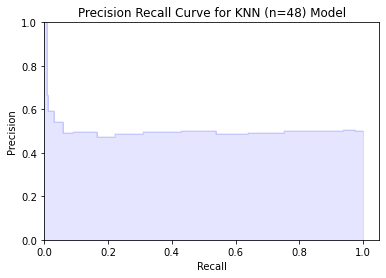

In [20]:
#Confusion matrix, precision recall curve for best k-value of minkowski distance metric
target_pred_knn = knn.predict(unscaled_data_test)
target_prob_knn = knn.predict_proba(unscaled_data_test)

print(evaluate_model(target_test,target_pred_knn,target_prob_knn[:,[1]],'KNN (n=48)'))

<h4>KNN on scaled PCA data</h4>

In [21]:
#KNN using scaled pca data on random value of k
k = 3
knn = KNeighborsClassifier(n_neighbors = k).fit(scaled_data_train,target_train)
target_pred = knn.predict(scaled_data_test)
print("Accuracy of model at K=3 is",metrics.accuracy_score(target_test, target_pred) * 100,"%")

Accuracy of model at K=3 is 49.29577464788733 %


Minimum error for cosine :- 0.4544600938967136 at K = 9
Minimum error for minkowski :- 0.460093896713615 at K = 38


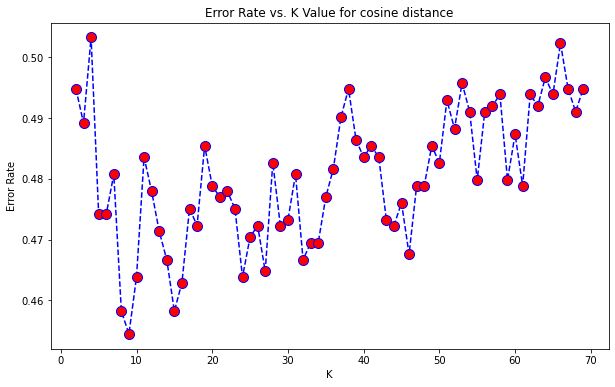

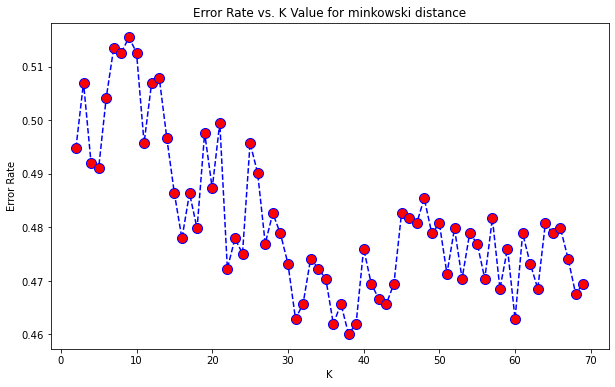

In [22]:
#KNN on scaled PCA data using minkowski and cosine metric, get best k value for both distance metric
for m in ("cosine","minkowski") :
    error_rate = []
    for i in range(2,70):
        knn = KNeighborsClassifier(n_neighbors=i , metric = m)
        knn.fit(scaled_data_train,target_train)
        pred_i = knn.predict(scaled_data_test)
        error_rate.append(np.mean(pred_i != target_test))


    plt.figure(figsize=(10,6))
    plt.plot(range(2,70),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value for '+m+' distance')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    print("Minimum error for",m,":-",min(error_rate),"at K =",error_rate.index(min(error_rate))+2)

In [23]:
#Get the accuracy for for best k-values of both the distacne metrics
k = 9
knn = KNeighborsClassifier(n_neighbors = k).fit(scaled_data_train,target_train)
target_pred = knn.predict(scaled_data_test)
print("Accuracy of model at K=9 for cosine metric is",metrics.accuracy_score(target_test, target_pred)*100,"%")

k = 38
knn = KNeighborsClassifier(n_neighbors = k).fit(scaled_data_train,target_train)
target_pred = knn.predict(scaled_data_test)
print("Accuracy of model at K=38 for minkowski metric is",metrics.accuracy_score(target_test, target_pred)*100,"%")

Accuracy of model at K=9 for cosine metric is 48.45070422535211 %
Accuracy of model at K=38 for minkowski metric is 53.990610328638496 %


In [30]:
#Read the file for a patient and predict the result with our trained model
#KNN for scaled data with PCA with k value of 25
d = pd.read_csv("C:\\Users\\saura\\Downloads\\Data_Parameters.txt")
li = list(d.columns)
li_new = []
for i in range(len(li)) :
    temp = li[i].replace("{","")
    temp = temp.replace("}","")
    temp = temp.replace("\"","")
    li_new.append(temp)
li_new.pop(10)
li_new.pop(9)
col = [i.split(":")[0].lower() for i in li_new]
value = [[i.split(":")[1]] for i in li_new]
col[0] = 'age'
col[6] = 'thalac'
col[3] = 'trestbps'
col[4] = 'chol'
col[-1] = 'fbs'
col[5] = 'restecg'
col[7] = 'exang'
col[8] = 'oldpeak'

d = pd.DataFrame(value,unscaled_data.columns)
d = d.transpose()
scaled_d = StandardScaler().fit_transform(d)

scaled_pca_d = scaled_pca.transform(scaled_d)
result_predict = knn.predict(scaled_pca_d)

result_predict = list(result_predict)
if result_predict[0] == 1 :
    result_predict.append("True, Patient at risk")
else :
    result_predict.append("False, No risk")
result_predict.pop(0)
result_predict = result_predict[0]
print(result_predict)
f = open("C:\\Users\\saura\\Downloads\\Webpages-20221111T153650Z-001\\Webpages\\result.txt", "w")
f.write(result_predict)
f.close()


True, Patient at risk


Confusion Matrix for KNN (n=38) Model
[[265 266]
 [224 310]]
Classification Report for KNN (n=38) Model
              precision    recall  f1-score   support

           0   0.541922  0.499058  0.519608       531
           1   0.538194  0.580524  0.558559       534

    accuracy                       0.539906      1065
   macro avg   0.540058  0.539791  0.539083      1065
weighted avg   0.540053  0.539906  0.539138      1065

Area under under ROC curve for KNN (n=38) Model
0.5442984405086861
None


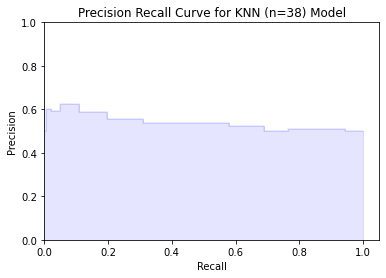

In [25]:
#Confusion matrix, precision recall curve for best k-value of minkowski distance metric
target_pred_knn = knn.predict(scaled_data_test)
target_prob_knn = knn.predict_proba(scaled_data_test)

print(evaluate_model(target_test,target_pred_knn,target_prob_knn[:,[1]],'KNN (n=38)'))

<h3>Logistic Regression</h3>

<h4>Logistic Regression on Unscaled data</h4>

In [26]:
#Logistic regression on Unscaled data 
unscaled_modelLR=LogisticRegression(random_state=0)
unscaled_modelLR.fit(unscaled_data_train,target_train)

#Getting the regression coefficient and intercept

print("We got the intercept b0 = ", unscaled_modelLR.intercept_)
print("We got the coefficient b1 = ", unscaled_modelLR.coef_)

prediction_result = unscaled_modelLR.predict(unscaled_data_test)

unscaled_modelLR_accuracy=accuracy_score(target_test,prediction_result)
print('We got the accuracy of the model = ',(unscaled_modelLR_accuracy)*100,'%')

report = classification_report(target_test, prediction_result)
print('\n\nClassification report of the  model is shown in the below table :\n\n',report)

We got the intercept b0 =  [0.02132019]
We got the coefficient b1 =  [[-0.00192237 -0.08022243  0.06132332 -0.00095918 -0.00047349  0.0473115
   0.03504548  0.00330403 -0.0152778  -0.00997898 -0.04365883]]
We got the accuracy of the model =  52.206572769953056 %


Classification report of the  model is shown in the below table :

               precision    recall  f1-score   support

           0       0.54      0.28      0.37       531
           1       0.52      0.76      0.62       534

    accuracy                           0.52      1065
   macro avg       0.53      0.52      0.49      1065
weighted avg       0.53      0.52      0.49      1065



[[149 382]
 [127 407]]


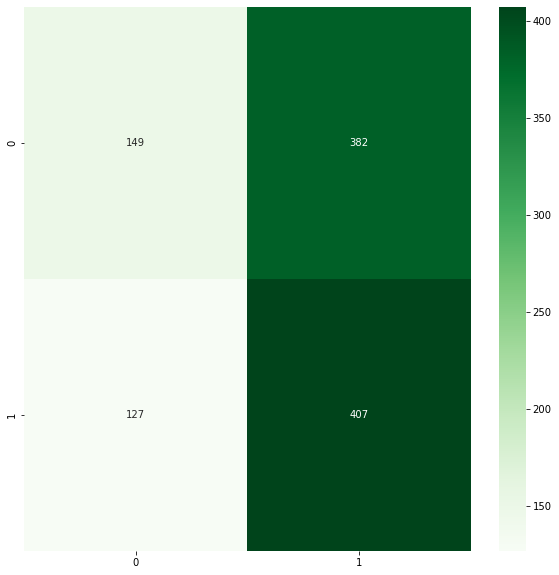

In [27]:
#Getting confusion matrix of the logisticRegression

cmatrix = confusion_matrix(target_test, prediction_result)
print(cmatrix)

#Visualization of the Confusion matrix

fig, axis = plt.subplots(figsize=(10, 10))
sns.heatmap(cmatrix, annot = True, fmt = 'd', cmap = "Greens",ax = axis)
plt.show()

<h4>Logistic Regression on Scaled PCA data</h4>

In [28]:
#Logistic regression on Scaled PCA data 
scaled_modelLR=LogisticRegression(random_state=0)
scaled_modelLR.fit(scaled_data_train,target_train)

#Getting the regression coefficient and intercept

print("We got the intercept b0 = ", scaled_modelLR.intercept_)
print("We got the coefficient b1 = ", scaled_modelLR.coef_)

prediction_result = scaled_modelLR.predict(scaled_data_test)

scaled_modelLR_accuracy=accuracy_score(target_test,prediction_result)
print('We got the accuracy of the model = ',(scaled_modelLR_accuracy)*100,'%')

report = classification_report(target_test, prediction_result)
print('\n\nClassification report of the  model is shown in the below table :\n\n',report)

We got the intercept b0 =  [0.07771053]
We got the coefficient b1 =  [[-0.07105085 -0.07175458]]
We got the accuracy of the model =  50.61032863849765 %


Classification report of the  model is shown in the below table :

               precision    recall  f1-score   support

           0       0.51      0.23      0.32       531
           1       0.50      0.78      0.61       534

    accuracy                           0.51      1065
   macro avg       0.51      0.51      0.47      1065
weighted avg       0.51      0.51      0.47      1065



[[124 407]
 [119 415]]


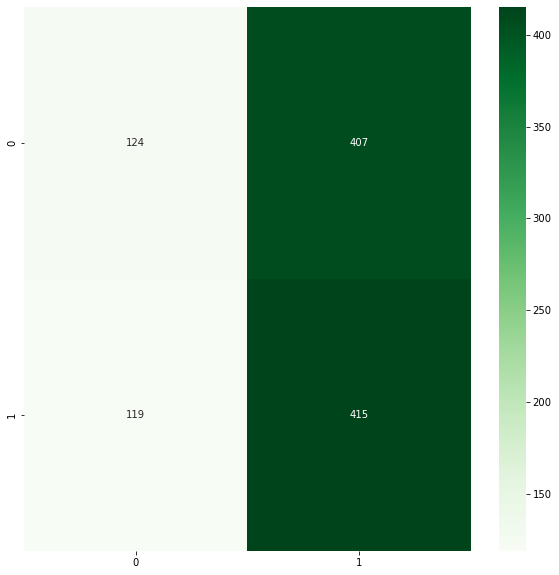

In [29]:
#Getting confusion matrix of the logisticRegression

cmatrix = confusion_matrix(target_test, prediction_result)
print(cmatrix)

#Visualization of the Confusion matrix

fig, axis = plt.subplots(figsize=(10, 10))
sns.heatmap(cmatrix, annot = True, fmt = 'd', cmap = "Greens",ax = axis)
plt.show()